# Image Segmentation
- Input: intensity image (grayscale) or color image
- Output: divided image into regions based on intensity, color, texture, or boundaries

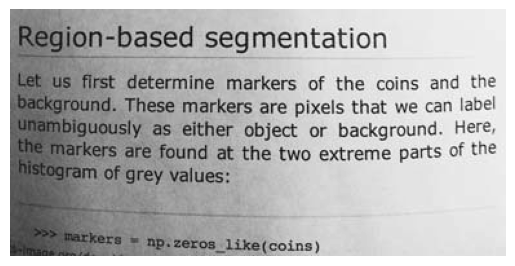

In [1]:
from skimage import data

import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale (and then to numpy array)
img_gray = data.page()

# Display the image
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

## Thresholding


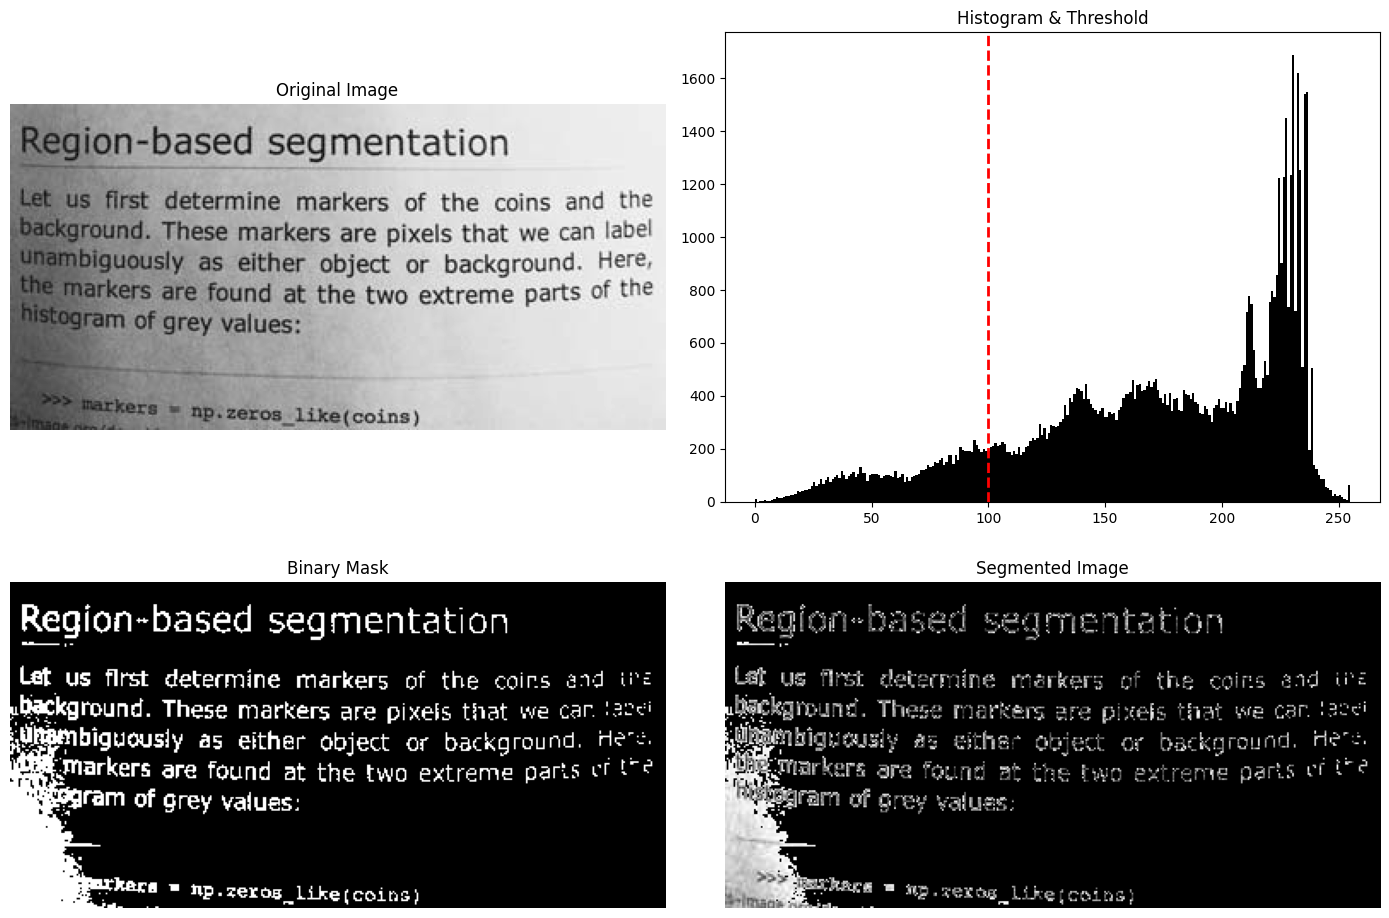

In [2]:
threshold = 100

# Create binary mask
binary_mask = img_gray < threshold

# Apply mask to segment the image
segmented_img = img_gray * binary_mask

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original image
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Histogram with threshold
axes[0, 1].hist(img_gray.flatten(), bins=256, color='black')
axes[0, 1].axvline(threshold, color='red', linestyle='dashed', linewidth=2)
axes[0, 1].set_title('Histogram & Threshold')

# Binary mask
axes[1, 0].imshow(binary_mask, cmap='gray')
axes[1, 0].set_title('Binary Mask')
axes[1, 0].axis('off')

# Segmented image
axes[1, 1].imshow(segmented_img, cmap='gray')
axes[1, 1].set_title('Segmented Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


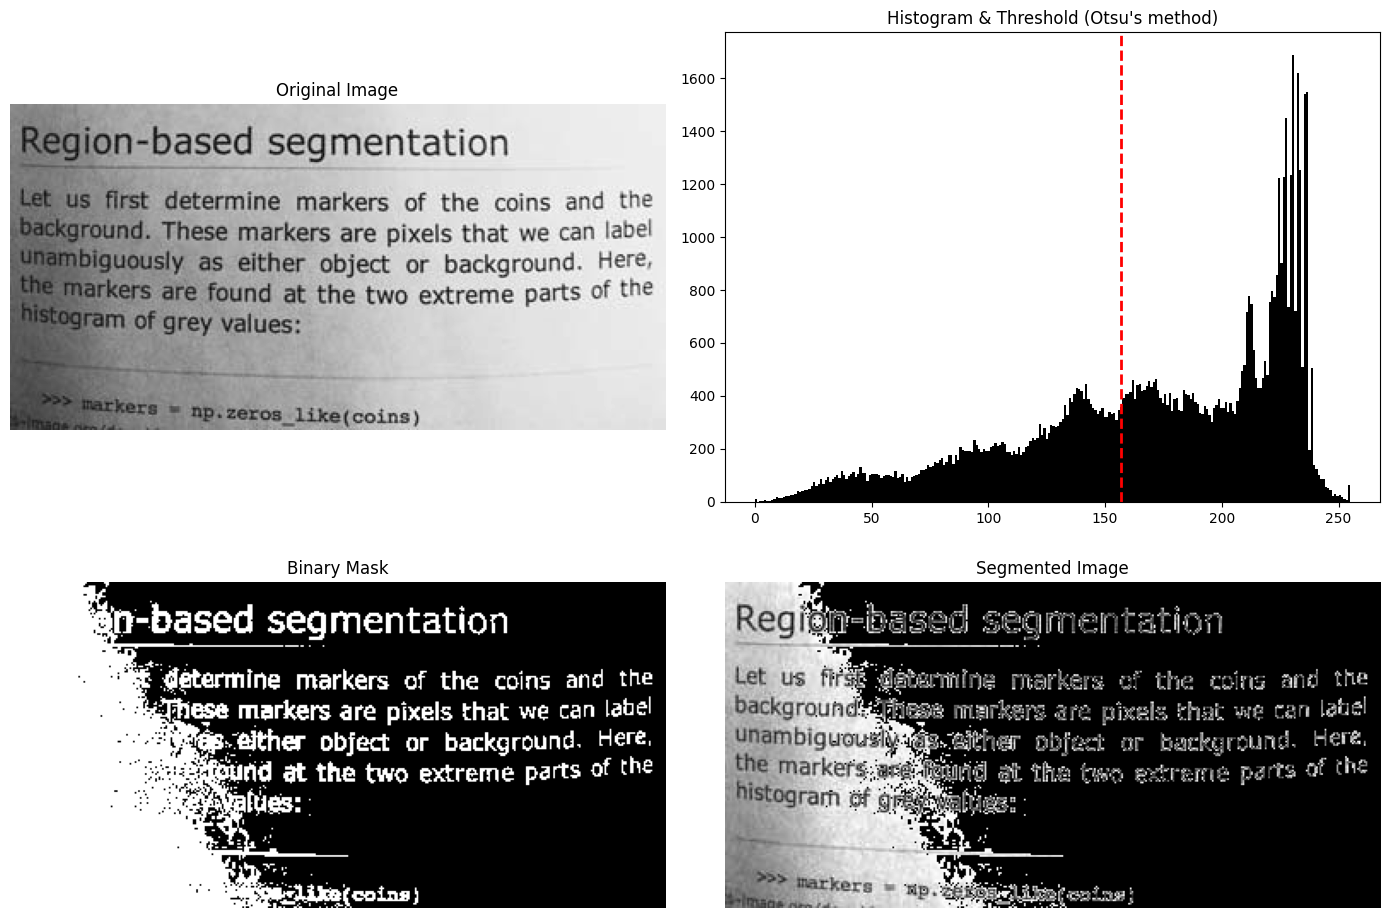

In [3]:
from skimage import filters

# Compute the threshold using Otsu's method
threshold = filters.threshold_otsu(img_gray)

# Create binary mask
binary_mask = img_gray < threshold

# Apply mask to segment the image
segmented_img = img_gray * binary_mask

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original image
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Histogram with threshold
axes[0, 1].hist(img_gray.flatten(), bins=256, color='black')
axes[0, 1].axvline(threshold, color='red', linestyle='dashed', linewidth=2)
axes[0, 1].set_title('Histogram & Threshold (Otsu\'s method)')

# Binary mask
axes[1, 0].imshow(binary_mask, cmap='gray')
axes[1, 0].set_title('Binary Mask')
axes[1, 0].axis('off')

# Segmented image
axes[1, 1].imshow(segmented_img, cmap='gray')
axes[1, 1].set_title('Segmented Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### Adaptive Thresholding (individual work)

**Objective:**
Your task is to separate the **text** from the **background** in an image using **adaptive thresholding** (without using built-in thresholding functions from external libraries). Unlike global thresholding, this method adapts to local intensity variations, making it suitable for images with uneven lighting.

**Instructions:**
1. Implement **local adaptive thresholding** using a **window size** of your choice.
2. Compute the threshold **for each pixel** as the **mean intensity** of its surrounding window.
3. Create a **binary mask**, where.
    - Pixels with intensity **below** the local threshold → **Foreground** (Text, White: `1`/`True`)
    - Pixels with intensity **above** the local threshold → **Background** (Black: `0`/`False`).
4. Display the results (Original Image, Binary Mask, and Segmented Image).

#### Code (scroll down)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

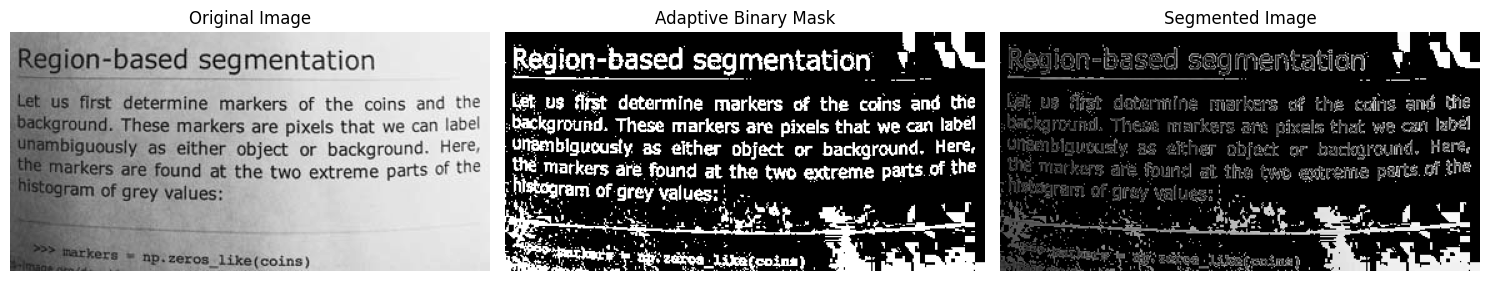

In [4]:
# Define window size for local thresholding
window_size = min(img_gray.shape) // 4
half_window = window_size // 2

# Pad the image to handle borders
padded_img = np.pad(img_gray, half_window, mode='reflect')

# Initialize output binary mask
adaptive_mask = np.zeros_like(img_gray, dtype=bool)

# Compute adaptive threshold for each pixel
# - The complete code will be provided during the exercise

# Apply mask to segment the image
adaptive_segmented = img_gray * adaptive_mask

# Plot results
# - The complete code will be provided during the exercise

**Note:**  

You can use `skimage.filters.threshold_local` to achieve the same result more efficiently. Lets try it to another image.

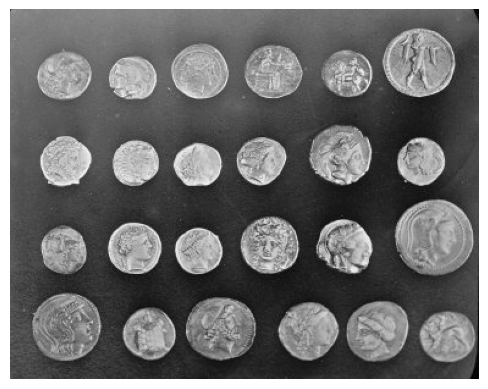

In [5]:
# Load image and convert to grayscale (and then to numpy array)
img_gray = data.coins()

# Display the image
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

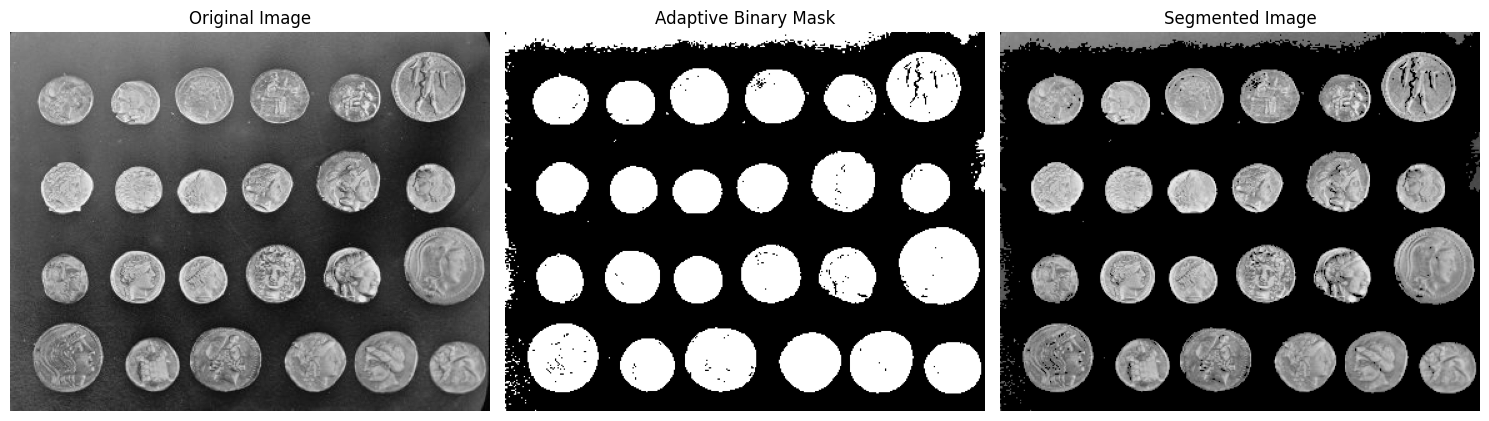

In [6]:
# Define window size for local thresholding
window_size = min(img_gray.shape) // 4

# Compute local threshold for each pixel
local_thresh = filters.threshold_local(img_gray, window_size, method='mean')

# Create binary mask
binary_mask = img_gray > local_thresh  # switched logic because now we are looking for brighter objects

# Apply mask to segment the image
segmented_img = img_gray * binary_mask

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Binary mask after using adaptive thresholding
axes[1].imshow(binary_mask, cmap='gray')
axes[1].set_title('Adaptive Binary Mask')
axes[1].axis('off')

# Segmented image
axes[2].imshow(segmented_img, cmap='gray')
axes[2].set_title('Segmented Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

**Note**  
The edges obtained from an edge detector can be post-processed to improve the resulting segmentation mask, e.g., by using morphological operations, which will be covered in the next exercise.

## Pattern-Based Segmentation
- Template Matching

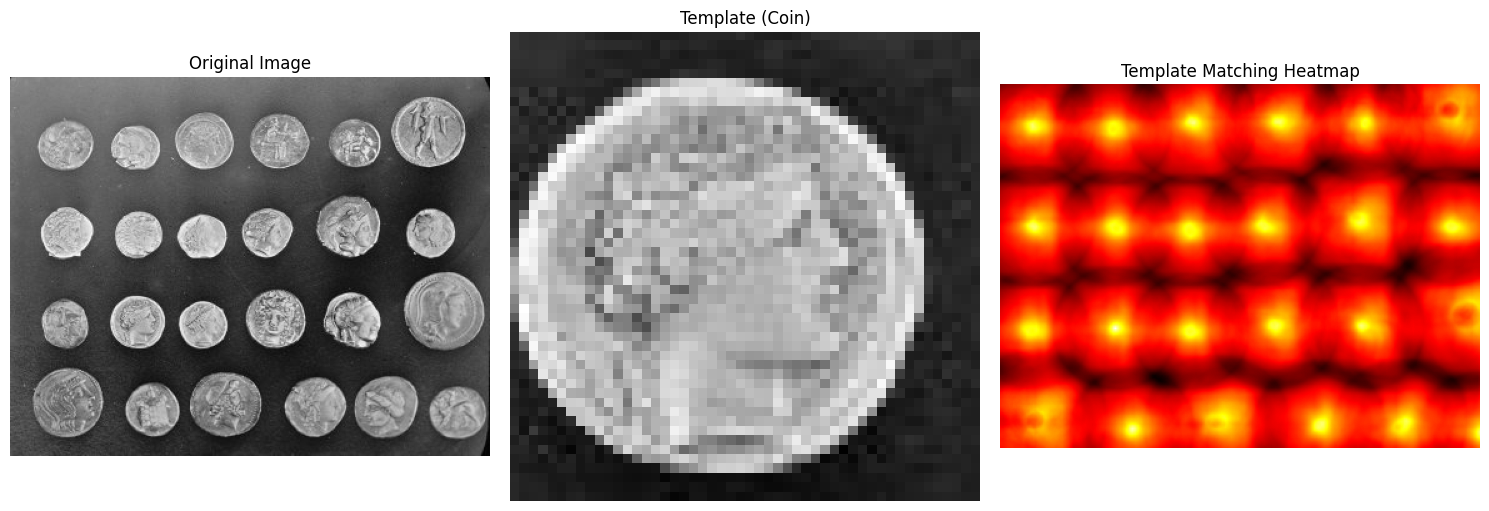

In [7]:
from skimage import feature

# Define a template by selecting a region from the image
template = img_gray[170:220, 80:130]  # We select a small region as our template

# Perform template matching using match_template
result = feature.match_template(img_gray, template)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image with coins
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Template
axes[1].imshow(template, cmap='gray')
axes[1].set_title('Template (Coin)')
axes[1].axis('off')

# Show the heat map of the matching result
axes[2].imshow(result, cmap='hot')
axes[2].set_title('Template Matching Heatmap')
axes[2].axis('off')

# Plot the result
plt.tight_layout()
plt.show()


**Note:**  
Then you can, for example, select a threshold to filter matches and apply post-processing (e.g., non-maxima suppression) to refine the results.

## Region-Based Segmentation

- Split & Merge
- Region Growing
- Watershed _(see the following example)_

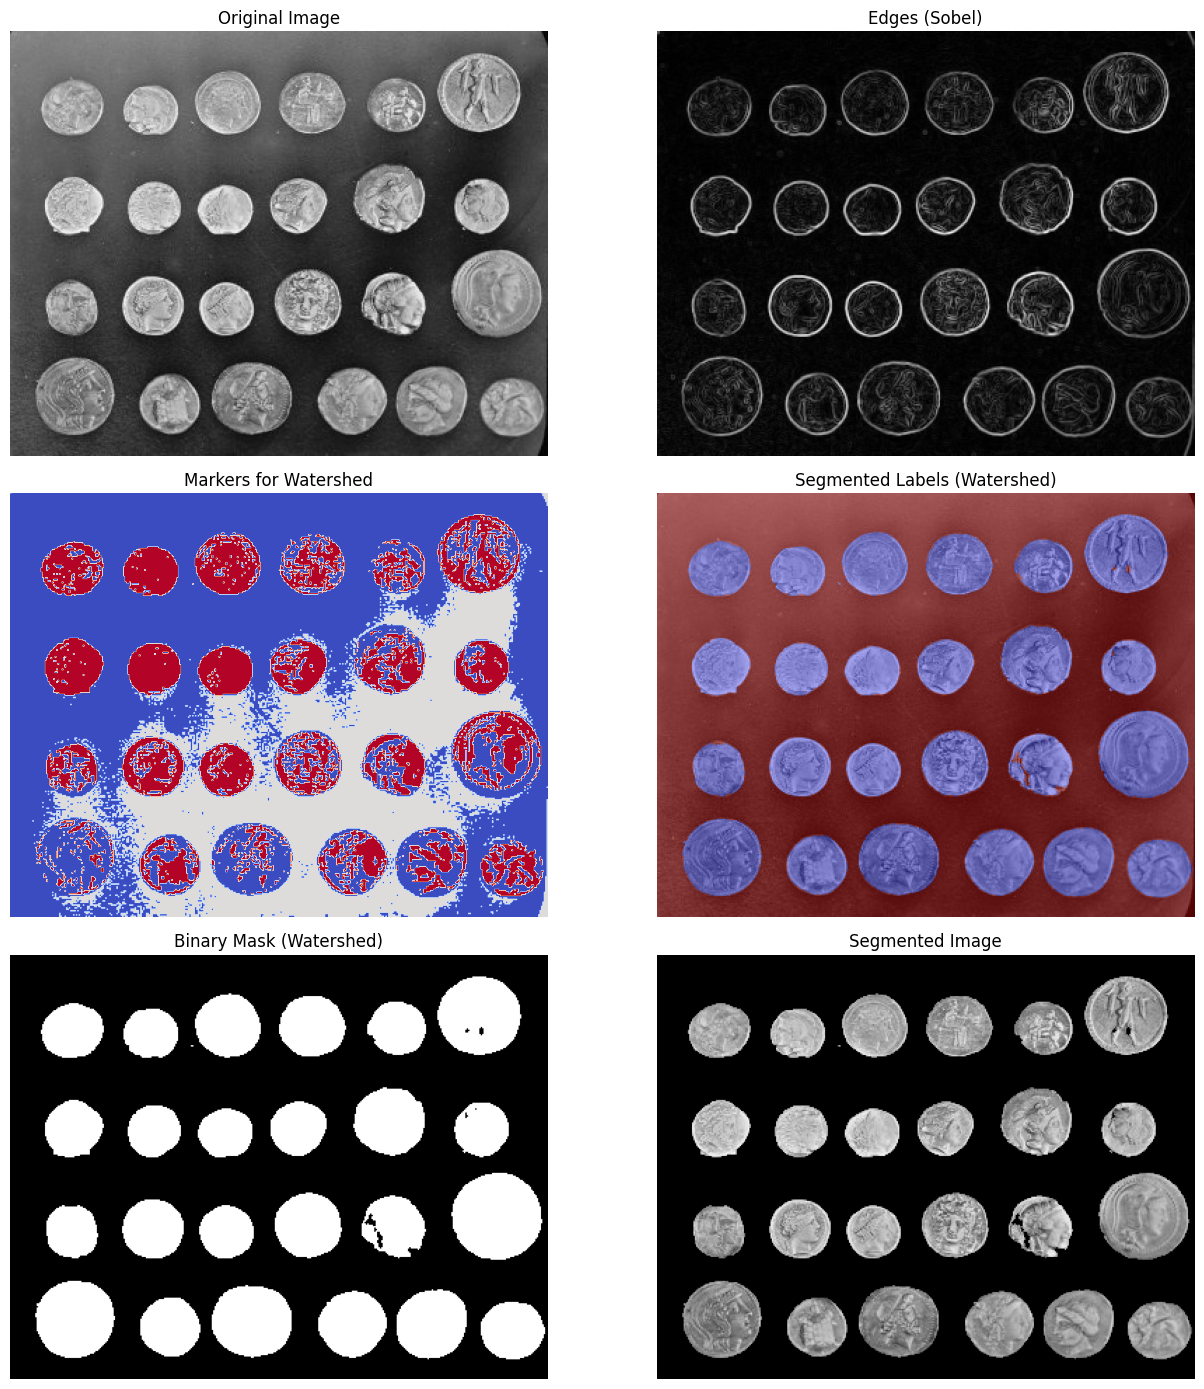

In [8]:
from skimage import segmentation, color

# Compute the gradient (edges)
edges = filters.sobel(img_gray)

# Generate markers for watershed
markers = np.zeros_like(img_gray)
markers[img_gray < 50] = 1   # Background marker
markers[img_gray > 150] = 2  # Foreground marker

# Apply watershed segmentation
labels = segmentation.watershed(edges, markers)
binary_mask = labels > 1                # ignore background (background == 1)
segmented_img = img_gray * binary_mask

# Plot results
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Original image
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Gradient (edges)
axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Edges (Sobel)')
axes[0, 1].axis('off')

# Markers used for watershed
axes[1, 0].imshow(markers, cmap='coolwarm')
axes[1, 0].set_title('Markers for Watershed')
axes[1, 0].axis('off')

# Labelled regions
axes[1, 1].imshow(color.label2rgb(labels, img_gray, alpha=0.3))
axes[1, 1].set_title('Segmented Labels (Watershed)')
axes[1, 1].axis('off')

# Binary Mask
axes[2, 0].imshow(binary_mask, cmap='gray')
axes[2, 0].set_title('Binary Mask (Watershed)')
axes[2, 0].axis('off')

# Segmented image
axes[2, 1].imshow(segmented_img, cmap='gray')
axes[2, 1].set_title('Segmented Image')
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

## Edge-Based Segmentation

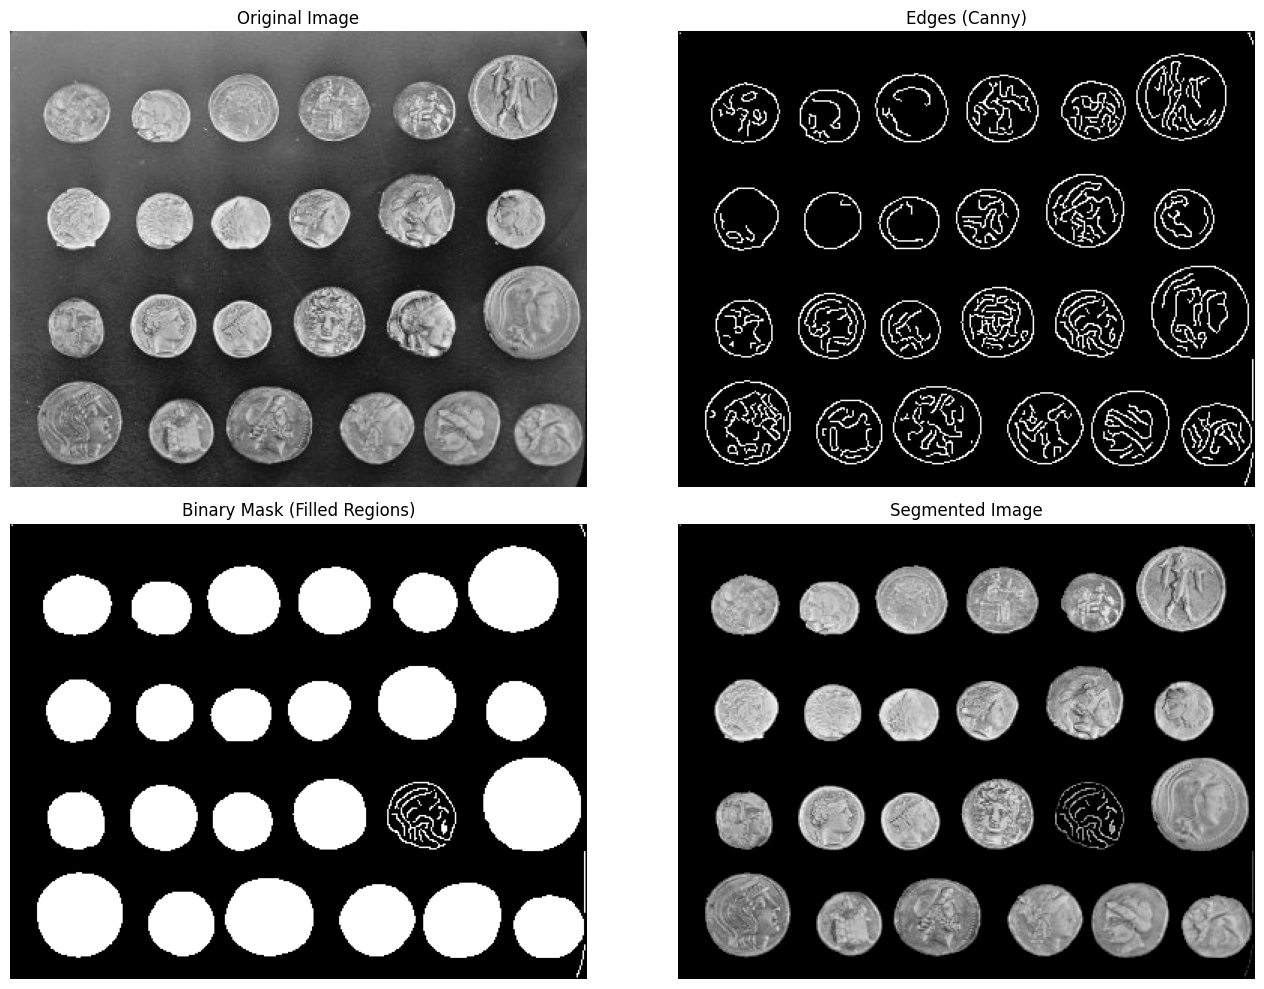

In [9]:
from skimage import feature
from scipy import ndimage

# Apply Canny edge detection and fill the holes
edges = feature.canny(img_gray, sigma=1.5)
filled_edges = ndimage.binary_fill_holes(edges)
segmented_img = img_gray * filled_edges

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original image
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Edges detected (Canny)
axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Edges (Canny)')
axes[0, 1].axis('off')

# Filled regions
axes[1, 0].imshow(filled_edges, cmap='gray')
axes[1, 0].set_title('Binary Mask (Filled Regions)')
axes[1, 0].axis('off')

# Segmented image
axes[1, 1].imshow(segmented_img, cmap='gray')
axes[1, 1].set_title('Segmented Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### Active Contur Model

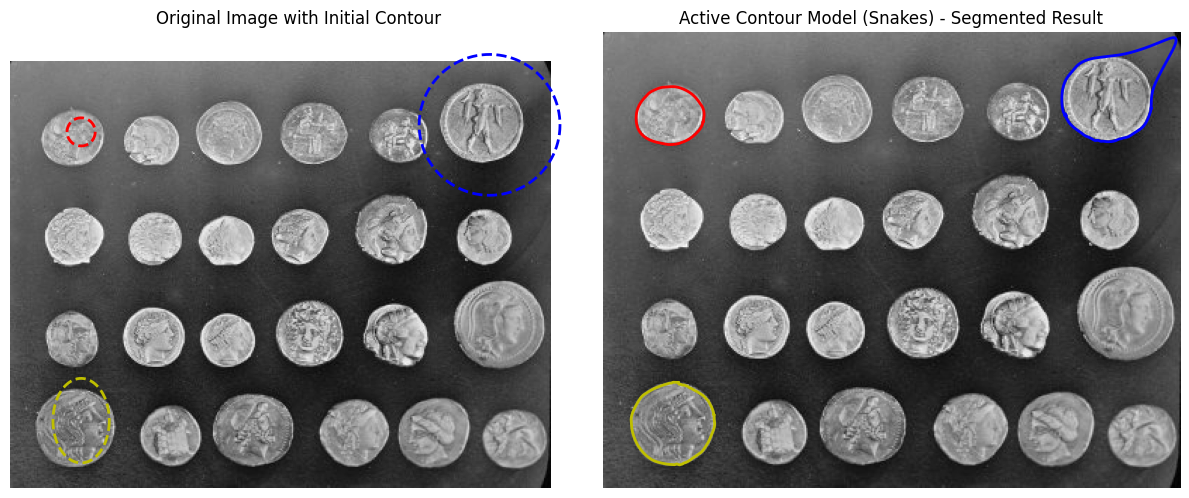

In [10]:
# Initialize the contour (a circle in this case)
s = np.linspace(0, 2 * np.pi, 400)              # generate 400 points to represent a circle
x, y = 10 * np.cos(s), 10 * np.sin(s)           # define a circle with given points
init_1 = np.array([50 + y, 50 + x]).T           # Initial contour (circle 1)
init_2 = np.array([255 + 3 * y, 50 + 2 * x]).T  # Initial contour (circle 2)
init_3 = np.array([45 + 5 * y, 340 + 5 * x]).T  # Initial contour (circle 3)

# Apply Active Contour Model (Snakes) on the image
snake_1 = segmentation.active_contour(filters.gaussian(img_gray, 3), init_1, alpha=0.015, beta=10, gamma=0.001)
snake_2 = segmentation.active_contour(filters.gaussian(img_gray, 3), init_2, alpha=0.015, beta=10, gamma=0.001)
snake_3 = segmentation.active_contour(filters.gaussian(img_gray, 3), init_3, alpha=0.015, beta=10, gamma=0.001)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original Image with Initial Contour')
axes[0].plot(init_1[:, 1], init_1[:, 0], '--r', lw=2)
axes[0].plot(init_2[:, 1], init_2[:, 0], '--y', lw=2)
axes[0].plot(init_3[:, 1], init_3[:, 0], '--b', lw=2)
axes[0].axis('off')

# Active contour result
axes[1].imshow(img_gray, cmap='gray')
axes[1].plot(snake_1[:, 1], snake_1[:, 0], '-r', lw=2)
axes[1].plot(snake_2[:, 1], snake_2[:, 0], '-y', lw=2)
axes[1].plot(snake_3[:, 1], snake_3[:, 0], '-b', lw=2)
axes[1].set_title('Active Contour Model (Snakes) - Segmented Result')
axes[1].axis('off')

plt.tight_layout()
plt.show()


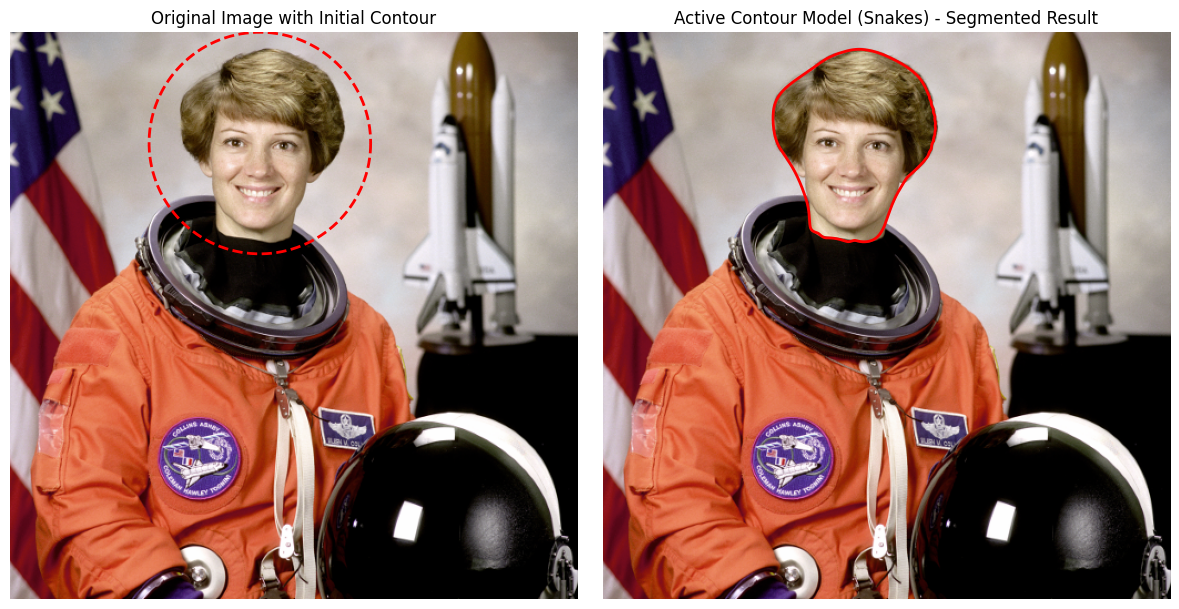

In [11]:
from PIL import Image

# Load another image and convert it into the grayscale
img = data.astronaut()
img_gray = np.array(Image.fromarray(img).convert('L'))

# Initialize the contour (use points from the previous)
init = np.array([100 + 10*y, 225 + 10*x]).T

# Apply Active Contour Model (Snakes) on the image
snake = segmentation.active_contour(filters.gaussian(img_gray, 3), init, alpha=0.015, beta=10, gamma=0.001)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(img)
axes[0].set_title('Original Image with Initial Contour')
axes[0].plot(init[:, 1], init[:, 0], '--r', lw=2)
axes[0].axis('off')

# Active contour result
axes[1].imshow(img)
axes[1].plot(snake[:, 1], snake[:, 0], '-r', lw=2)
axes[1].set_title('Active Contour Model (Snakes) - Segmented Result')
axes[1].axis('off')

plt.tight_layout()
plt.show()